Load the `ISLR2` and `tidyverse` packages.

In [1]:

library('tidyverse')
library('ISLR2')
library('tidymodels')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ 

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
Auto |> glimpse()


Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

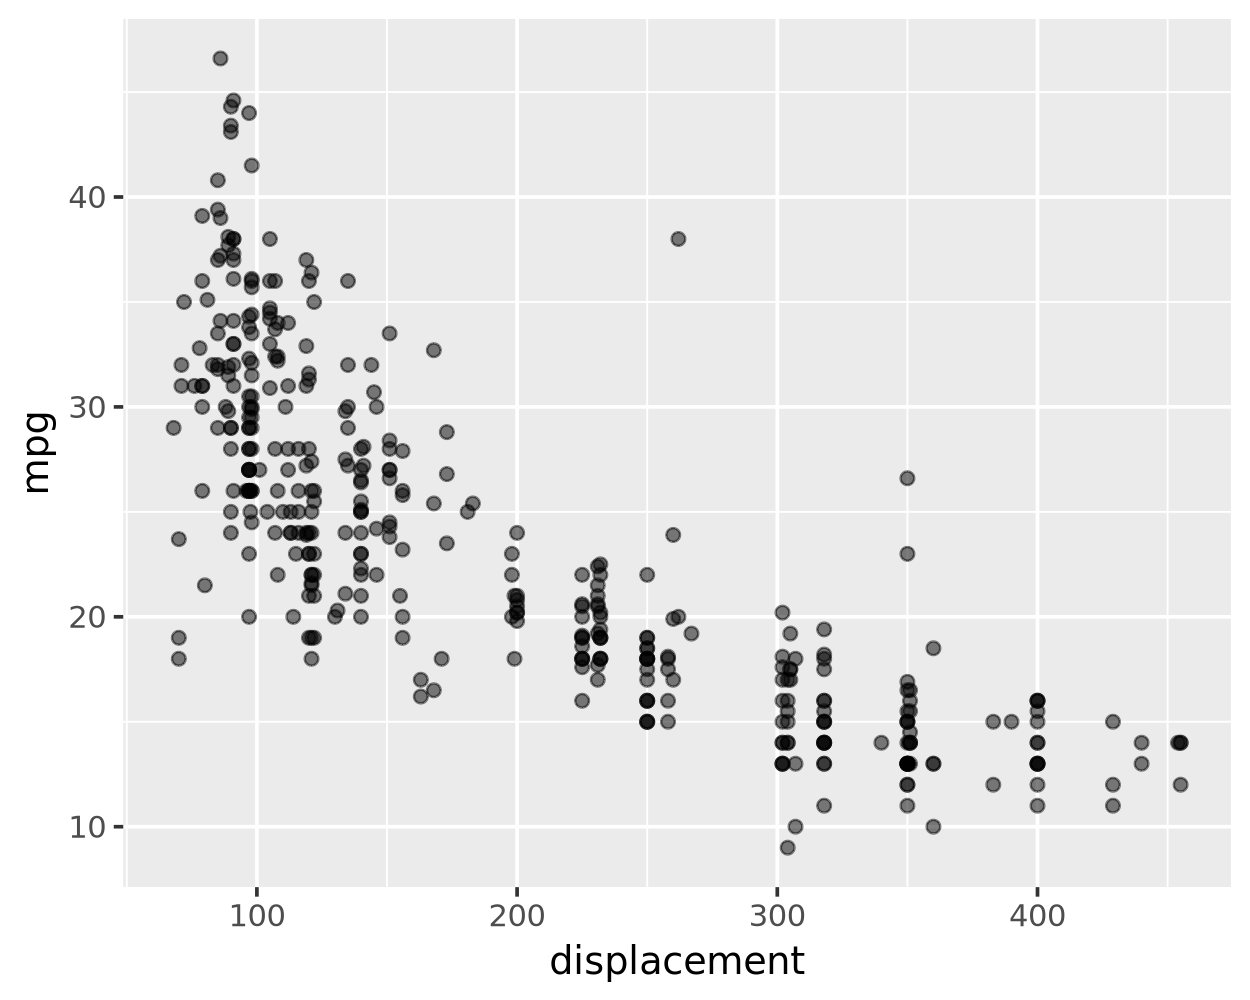

In [3]:
ggplot(data = Auto) +
    geom_point(aes(x = displacement, y = mpg), alpha = .5) 
 

❓Does the relationship of `mpg` to `displacement` look linear?

**Answer:** The relationship of mpg to displacement appears to be linear with some curvature.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [4]:
# Transform the data

rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_poly(displacement, options = c(raw = TRUE), degree = 3) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    prep()

juice(rec) |> head()


Warning message in opts$degree <- x$degree:
“Coercing LHS to a list”


cylinders,mpg,displacement_poly_1,displacement_poly_2,displacement_poly_3,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,18,307,94249,28934443,0,0,0,1
8,15,350,122500,42875000,0,0,0,1
8,18,318,101124,32157432,0,0,0,1
8,16,304,92416,28094464,0,0,0,1
8,17,302,91204,27543608,0,0,0,1
8,15,429,184041,78953589,0,0,0,1


In [5]:
# Run the model

mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ .,data = rec |> juice())

mod_fit

parsnip model object


Call:
stats::lm(formula = mpg ~ ., data = data)

Coefficients:
        (Intercept)            cylinders  displacement_poly_1  
          2.886e+01            2.543e+00           -2.705e-01  
displacement_poly_2  displacement_poly_3           cyl_cat_X4  
          7.487e-04           -7.300e-07            1.164e+01  
         cyl_cat_X5           cyl_cat_X6           cyl_cat_X8  
          1.119e+01            6.520e+00                   NA  


Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


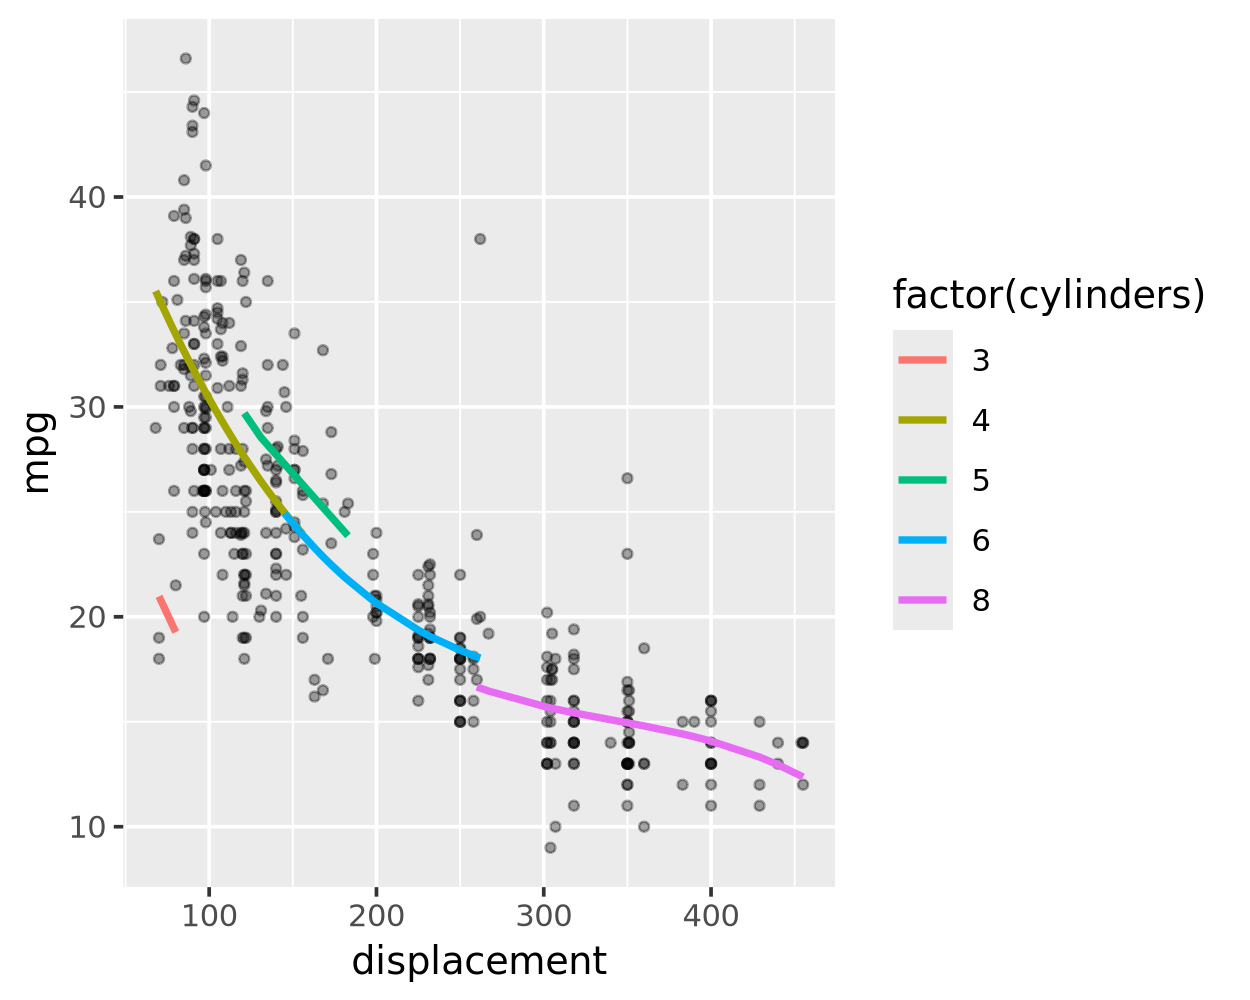

In [6]:
# Visualize the model

predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
